### 08-1 합성곱 신경망의 구성 요소

### 합성곱
- 데이터에 유용한 특성만 드러나게 하는 것
- 필터(커널): 데이터의 특정 패턴이나 특징을 감지하는 작은 행렬
- 특성맵: 합성곱 계산을 통해 얻은 출력

### 케라스 합성곱 층
- 합성곱 신경망: 1개 이상의 합성곱 층을 쓴 인공 신경망
- 패딩: 입력 배열의 주위를 가상의 원소로 채움 - 실제값이 아니라 0으로 채움 (6,6) -> 크기가 줄어들어서 주위에 패딩값을 채움 정보손실 방지
- 스트라이드: 이동의 크기 - 왠만해선 1칸씩 이동 기본값 그대로 유지
- 풀링: 합성곱층에서 만든 특성 맵의 가로세로 크기를 줄이는 역활

### 합성곱 신경망의 전체 구조
- 합성곱: 밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산 - 입력 전체가  아니라 일부만 사용
- 필터(커널): 밀집층의 뉴런에 해당 - 자주 사용되는 커널 크기 (3,3), (5,5)
- 특성 맵: 합성곱 층이나 풀링 층의 출력 배열 - 필터 하나가 하나의 특성 맵을 만듬(합성곱 층에 5개의 필터를 적용하면 5개의 특성맵 생성)
- 패딩: 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀
- 스트라이드: 합성곱 층에서 필터가 입력 위를 이동하는 크기 - 일반적으로 1픽셀 사용
- 풀링: 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역활(최대 풀링, 평균 풀링)

### 08-2 합성곱 신경망을 사용한 이미지 분류

### MNIST 데이터 불러오기
- 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야한다.
- 입력 이미지는 항상 깊이(채널) 차원이 있어야 한다.
- 흑백 이미지는 reshape를 사용하여 1을 넣어준다.

In [11]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2,
                                                                      random_state=42)

### 합성곱 신경망 만들기

In [12]:
model = keras.Sequential()

In [13]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

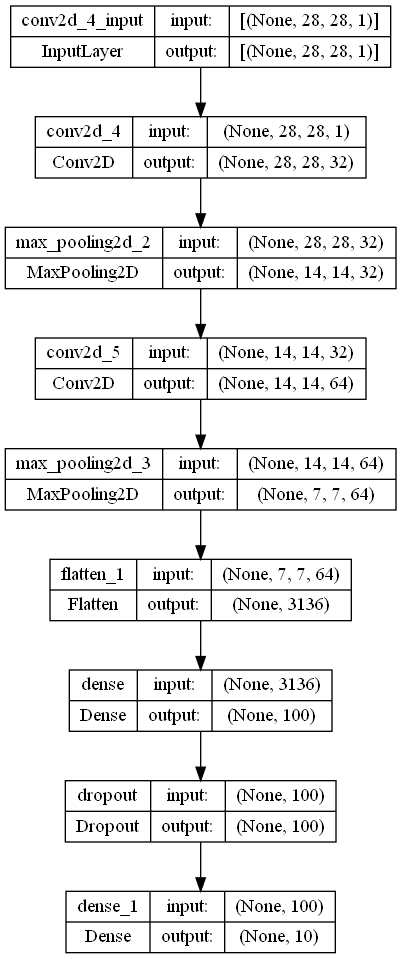

In [16]:
keras.utils.plot_model(model, show_shapes=True)

### 모델 컴파일과 훈련

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
# restore_best_weights=True 현재 model 객체가 최적의 모델 파라미터로 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20


1500/1500 [==============================] - 13s 8ms/step - loss: 0.5172 - accuracy: 0.8154 - val_loss: 0.3353 - val_accuracy: 0.8776
Epoch 2/20
  13/1500 [..............................] - ETA: 13s - loss: 0.3495 - accuracy: 0.8702

c:\Users\baesuhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 12s 8ms/step - loss: 0.3376 - accuracy: 0.8795 - val_loss: 0.2787 - val_accuracy: 0.8958
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2874 - accuracy: 0.8967 - val_loss: 0.2557 - val_accuracy: 0.9061
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2567 - accuracy: 0.9065 - val_loss: 0.2341 - val_accuracy: 0.9138
Epoch 5/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2314 - accuracy: 0.9161 - val_loss: 0.2222 - val_accuracy: 0.9185
Epoch 6/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2142 - accuracy: 0.9211 - val_loss: 0.2424 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1941 - accuracy: 0.9275 - val_loss: 0.2117 - val_accuracy: 0.9247
Epoch 8/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1788 - accuracy: 0.9344 - val_loss: 0.2151 - val_accuracy: 

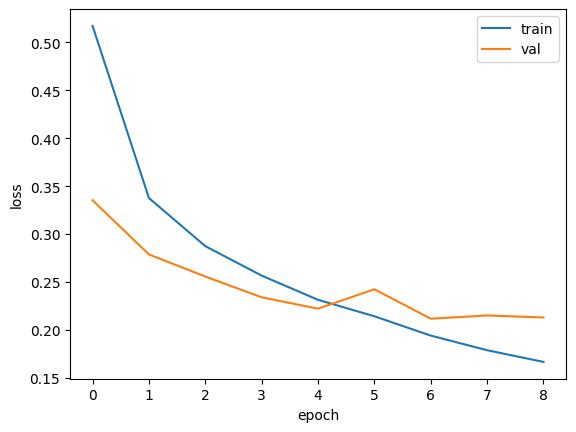

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2117 - accuracy: 0.9247


[0.21169665455818176, 0.9247499704360962]

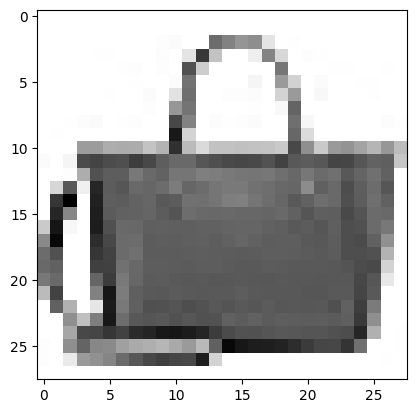

In [22]:
# 흑백 이미지는 차원이 없어서 reshape로 변경
plt.imshow(val_scaled[0].reshape(28, 28),cmap='gray_r')
plt.show()

In [23]:
# 예측하기
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 77ms/step
[[4.1899679e-16 1.8106667e-18 1.5842531e-16 4.3742465e-16 2.8639912e-14
  8.2415838e-14 4.5315962e-15 7.3881263e-15 1.0000000e+00 6.3124392e-14]]


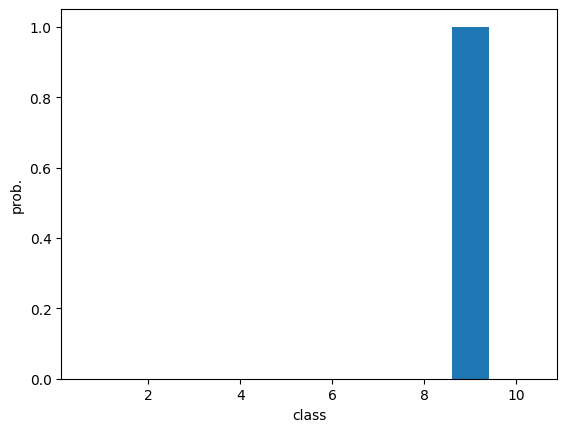

In [27]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [28]:
# 레이블 저장
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방', '앵클 부츠']

In [29]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [30]:
# 시험 데이터 픽셀 값 0 ~ 1 사이로 변경하고 흑백 차원 1 추가
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [31]:
# 테스트 세트에 대한 성능
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2392 - accuracy: 0.9130


[0.23915225267410278, 0.9129999876022339]

In [32]:
print(model.evaluate(train_scaled, train_target)) # 훈련 데이터
print(model.evaluate(val_scaled, val_target)) # 검증 데이터
print(model.evaluate(test_scaled, test_target)) # 시험 데이터

1500/1500 [==============================] - 5s 4ms/step - loss: 0.1358 - accuracy: 0.9510
[0.1357862949371338, 0.9509791731834412]
375/375 [==============================] - 2s 4ms/step - loss: 0.2117 - accuracy: 0.9247
[0.21169665455818176, 0.9247499704360962]
313/313 [==============================] - 1s 4ms/step - loss: 0.2392 - accuracy: 0.9130
[0.23915225267410278, 0.9129999876022339]


### 08-3 합성곱 신경망의 가중치

### 가중치 시각화

In [33]:
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

In [35]:
model.layers

In [36]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [37]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02209508 0.23819408


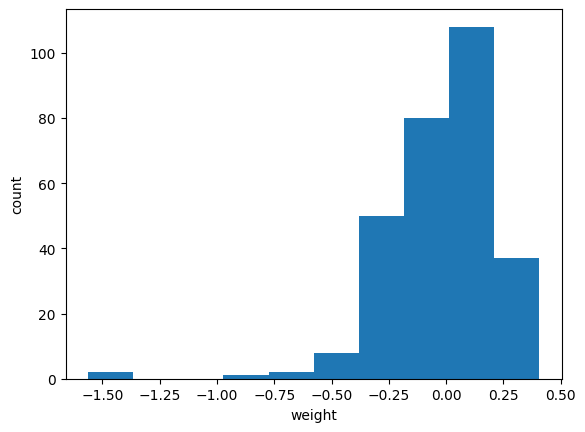

In [38]:
# 가중치 분포 히스토그램
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1)) # 1차원으로 전달해야함
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

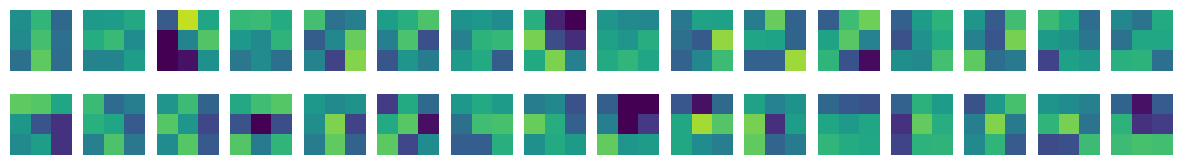

In [39]:
fig ,axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [40]:
# 훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [41]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [42]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.003226271 0.07949771


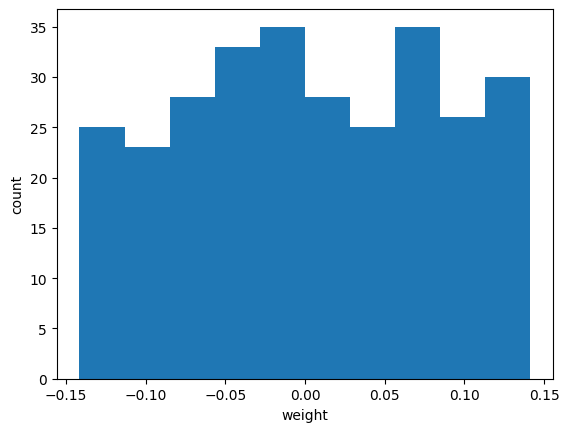

In [43]:
plt.hist(no_training_weights.reshape(-1, 1)) # 1차원으로 전달해야함
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

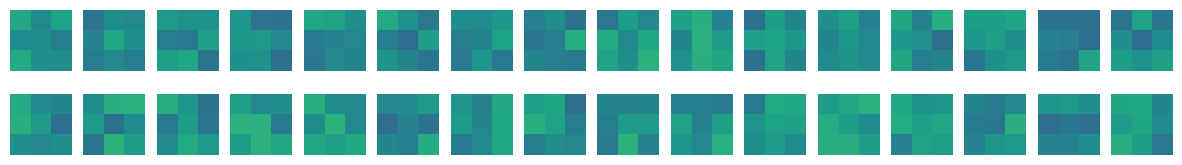

In [44]:
fig ,axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()